# 1b. Aproximacion a la funcion polinomial 1+2x+4x^3

In [1]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam 

from matplotlib import pyplot as plt 
import numpy as np 
import math

In [2]:
#1b polinomio 
class ODEsolver(Sequential): 
    def __init__(self, **kwargs): 
        super().__init__(**kwargs) #usamos el init de la clase Sequential
        self.loss_tracker = keras.metrics.Mean(name="loss") #funcion de costo
    
    @property 
    def metrics(self):
        return [self.loss_tracker]
    
    def train_step(self, data): #paso de entrenamiento
        
        batch_size = tf.shape(data)[0]
        
        #vector de numeros aleatorios
        x = tf.random.uniform((batch_size, 1), minval = -1, maxval = 1)
        
        
        #GradientTape es la funcion que calcula derivadas
        with tf.GradientTape() as tape:
            with tf.GradientTape() as tape2:
                tape2.watch(x) #vigila todas las operaciones que se hacen con la variable x
                y_pred = self(x, training = True) #evalua la derivada de cada valor de x
            
            dy = tape2.gradient(y_pred, x)
            
            #vectores de ceros
            x_o = tf.zeros((batch_size, 1))
            y_o = self(x_o, training = True)

            x_1 = tf.ones((batch_size, 1))
            y_1 = self(x_1, training = True) 

            x_m_1 = -tf.ones((batch_size, 1))
            y_m_1 = self(x_m_1, training = True) 
            #funcion de costo, es la ecuacion diferencial 1+2x+4x^3
            eq = y_pred-1.-2.*x-4.*x**3
            
            #initial condition, y(0) = 1
            ic = y_o -1.
            ic_1 = y_1 - 7.
            ic_m_1 = y_m_1 +5.
            #queremos que el error sea 0 
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic_1) + keras.losses.mean_squared_error(0., ic_m_1)
    
    #como cambia la funcion de costo, por ende, el loss, si cambian las trainable_variables (asi se llaman, ya estan definidas en la clase Sequential)
    #gradientes
        grads =tape.gradient(loss, self.trainable_variables)
    
    #muevete en direccion contraria a los gradientes, tiene como argumento el gradiente y su correspondiente variable
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
    
    #guarda un historial de la perdida de la funcion de costo
        self.loss_tracker.update_state(loss)
    
    #imprime el historial de la funcion de costo 
        return  {"loss": self.loss_tracker.result()}
    
            

In [3]:
model = ODEsolver()

model.add(Dense(20, activation = "tanh", input_shape = (1, ) ))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation ="linear"))


model.summary()
model.compile(optimizer =RMSprop(), metrics = ["loss"])


Model: "od_esolver"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [4]:
x = tf.linspace(-1, 1, 100) 
history = model.fit(x, epochs = 1000, verbose =1) 

#dominio 
x_testv = tf.linspace(-1, 1, 100)

a = model.predict(x_testv)


Epoch 1/1000
4/4 [==============================] - 1s 2ms/step - loss: 86.5921
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 81.5613
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 78.7464
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 74.8461
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 73.3943
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 69.1246
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 67.7109
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 65.8465
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 63.6506
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 60.6963
Epoch 11/1000
4/4 [==============================] - 0s 2ms/step - loss: 59.3955
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 56.4157
Epoch 13/1000
4/4 [==================

4/4 [==============================] - 0s 2ms/step - loss: 3.1244
Epoch 103/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.9637
Epoch 104/1000
4/4 [==============================] - 0s 2ms/step - loss: 3.0133
Epoch 105/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.0490
Epoch 106/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.9478
Epoch 107/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.9460
Epoch 108/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.8694
Epoch 109/1000
4/4 [==============================] - 0s 4ms/step - loss: 2.6975
Epoch 110/1000
4/4 [==============================] - 0s 3ms/step - loss: 3.0609
Epoch 111/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.4836
Epoch 112/1000
4/4 [==============================] - 0s 3ms/step - loss: 2.5938
Epoch 113/1000
4/4 [==============================] - 0s 2ms/step - loss: 2.7276
Epoch 114/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.7166
Epoch 204/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.6626
Epoch 205/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6797
Epoch 206/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6208
Epoch 207/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6078
Epoch 208/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6442
Epoch 209/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6056
Epoch 210/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5866
Epoch 211/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5938
Epoch 212/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5472
Epoch 213/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.4754
Epoch 214/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.5060
Epoch 215/1000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 305/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0187
Epoch 306/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 307/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 308/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0230
Epoch 309/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 310/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0218
Epoch 311/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 312/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 313/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0221
Epoch 314/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 315/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 316/1000
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 406/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0132
Epoch 407/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 408/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 409/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 410/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 411/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0152
Epoch 412/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 413/1000
4/4 [==============================] - 0s 998us/step - loss: 0.0057
Epoch 414/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 415/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 416/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 417/1000
4/4 [===================

4/4 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 507/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 508/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 509/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 510/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0061
Epoch 511/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 512/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 513/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 514/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 515/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 516/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 517/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 518/1000
4/4 [=====================

4/4 [==============================] - 0s 1ms/step - loss: 0.0120
Epoch 608/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 609/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 610/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0110
Epoch 611/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 612/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0141
Epoch 613/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 614/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 615/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0129
Epoch 616/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 617/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0085
Epoch 618/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0182
Epoch 619/1000
4/4 [===============

Epoch 708/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0109
Epoch 709/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 710/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0090
Epoch 711/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 712/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 713/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0078
Epoch 714/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 715/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0059
Epoch 716/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0100
Epoch 717/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 718/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0135
Epoch 719/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 720/1000
4/4 [

4/4 [==============================] - 0s 2ms/step - loss: 0.0105
Epoch 809/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0069
Epoch 810/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 811/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 812/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 813/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 814/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 815/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 816/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 817/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 818/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 819/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 820/1000
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 909/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 910/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 911/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 912/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 913/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 914/1000
4/4 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 915/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0065
Epoch 916/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0073
Epoch 917/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 918/1000
4/4 [==============================] - 0s 997us/step - loss: 0.0100
Epoch 919/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 920/1000
4/4 [=================

In [ ]:
#model.save("rna_edo_solver1")

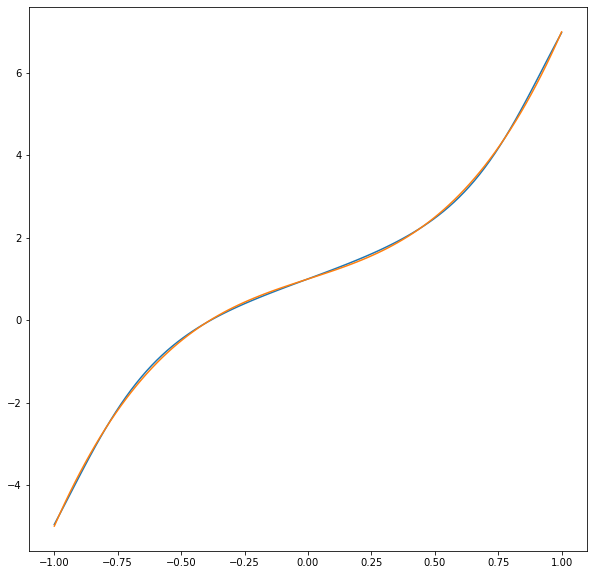

In [5]:
plt.figure(figsize = (10,10))

#grafica de la funcion aproximada por la RNA
plt.plot(x_testv, a)

#grafica de la funcion polinomial
plt.plot(x_testv, 1.+2.*x+4.*x**3) 
plt.show()

